#  EX.1 Conv2 NN 

In [2]:
import numpy as np

def convolve_2d(image, filter_kernel):
    """
    Performs a valid 2D convolution between an image and a filter.
    """
    h_img, w_img = image.shape
    h_filter, w_filter = filter_kernel.shape
    
    # Calculate output dimensions (n - f + 1)
    h_out = h_img - h_filter + 1
    w_out = w_img - w_filter + 1
    
    output = np.zeros((h_out, w_out))
    
    # Slide the filter over the image
    for i in range(h_out):
        for j in range(w_out):
            # Extract the region of interest (ROI)
            region = image[i:i+h_filter, j:j+w_filter]
            # Perform element-wise multiplication and sum
            output[i, j] = np.sum(region * filter_kernel)
            
    return output

# ==========================================
# Example 1: The Specific Calculation (Math Check)
# ==========================================
print("--- Example 1: Specific Math Check ---")
# The 6x6 input matrix from the video/text
input_matrix = np.array([
    [3, 0, 1, 2, 7, 4],
    [1, 5, 8, 9, 3, 1],
    [2, 7, 2, 5, 1, 3],
    [0, 1, 3, 1, 7, 8],
    [4, 2, 1, 6, 2, 8],
    [2, 4, 5, 2, 3, 9]
])

# The Vertical Edge Filter (3x3)
vertical_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

result_1 = convolve_2d(input_matrix, vertical_filter)

print("Input (Top-Left 3x3 subset):")
print(input_matrix[:3, :3])
print("\nFilter:")
print(vertical_filter)
print("\nCalculation for first pixel: (3*1 + 0*0 + 1*-1) + (1*1 + 5*0 + 8*-1) + (2*1 + 7*0 + 2*-1)")
print(f"Expected Result: -5")
print(f"Actual Computed Result (Top-Left pixel): {result_1[0,0]}")
print("\nFull Output Matrix (4x4):")
print(result_1)


# ==========================================
# Example 2: Vertical Edge Detection Intuition
# ==========================================
print("\n\n--- Example 2: Vertical Edge Detection (10s and 0s) ---")
# Create 6x6 image: Left half 10, Right half 0
image_vertical = np.zeros((6, 6))
image_vertical[:, :3] = 10

print("Input Image (Simplified):")
print(image_vertical)

# Apply the same vertical filter
result_vertical = convolve_2d(image_vertical, vertical_filter)

print("\nOutput (Detecting the vertical edge in the center):")
print(result_vertical)
# You will see '30's in the middle, indicating a strong positive vertical edge.


# ==========================================
# Example 3: Horizontal Edge Detection
# ==========================================
print("\n\n--- Example 3: Horizontal Edge Detection ---")
# Create 6x6 image: Top half 10, Bottom half 0
image_horizontal = np.zeros((6, 6))
image_horizontal[:3, :] = 10

# Create Horizontal Filter (Rotated 90 degrees)
horizontal_filter = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

print("Input Image (Horizontal Split):")
print(image_horizontal)
print("\nHorizontal Filter:")
print(horizontal_filter)

# Apply horizontal filter
result_horizontal = convolve_2d(image_horizontal, horizontal_filter)

print("\nOutput (Detecting the horizontal edge):")
print(result_horizontal)

--- Example 1: Specific Math Check ---
Input (Top-Left 3x3 subset):
[[3 0 1]
 [1 5 8]
 [2 7 2]]

Filter:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Calculation for first pixel: (3*1 + 0*0 + 1*-1) + (1*1 + 5*0 + 8*-1) + (2*1 + 7*0 + 2*-1)
Expected Result: -5
Actual Computed Result (Top-Left pixel): -5.0

Full Output Matrix (4x4):
[[ -5.  -4.   0.   8.]
 [-10.  -2.   2.   3.]
 [  0.  -2.  -4.  -7.]
 [ -3.  -2.  -3. -16.]]


--- Example 2: Vertical Edge Detection (10s and 0s) ---
Input Image (Simplified):
[[10. 10. 10.  0.  0.  0.]
 [10. 10. 10.  0.  0.  0.]
 [10. 10. 10.  0.  0.  0.]
 [10. 10. 10.  0.  0.  0.]
 [10. 10. 10.  0.  0.  0.]
 [10. 10. 10.  0.  0.  0.]]

Output (Detecting the vertical edge in the center):
[[ 0. 30. 30.  0.]
 [ 0. 30. 30.  0.]
 [ 0. 30. 30.  0.]
 [ 0. 30. 30.  0.]]


--- Example 3: Horizontal Edge Detection ---
Input Image (Horizontal Split):
[[10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.

# EX.2 Padding

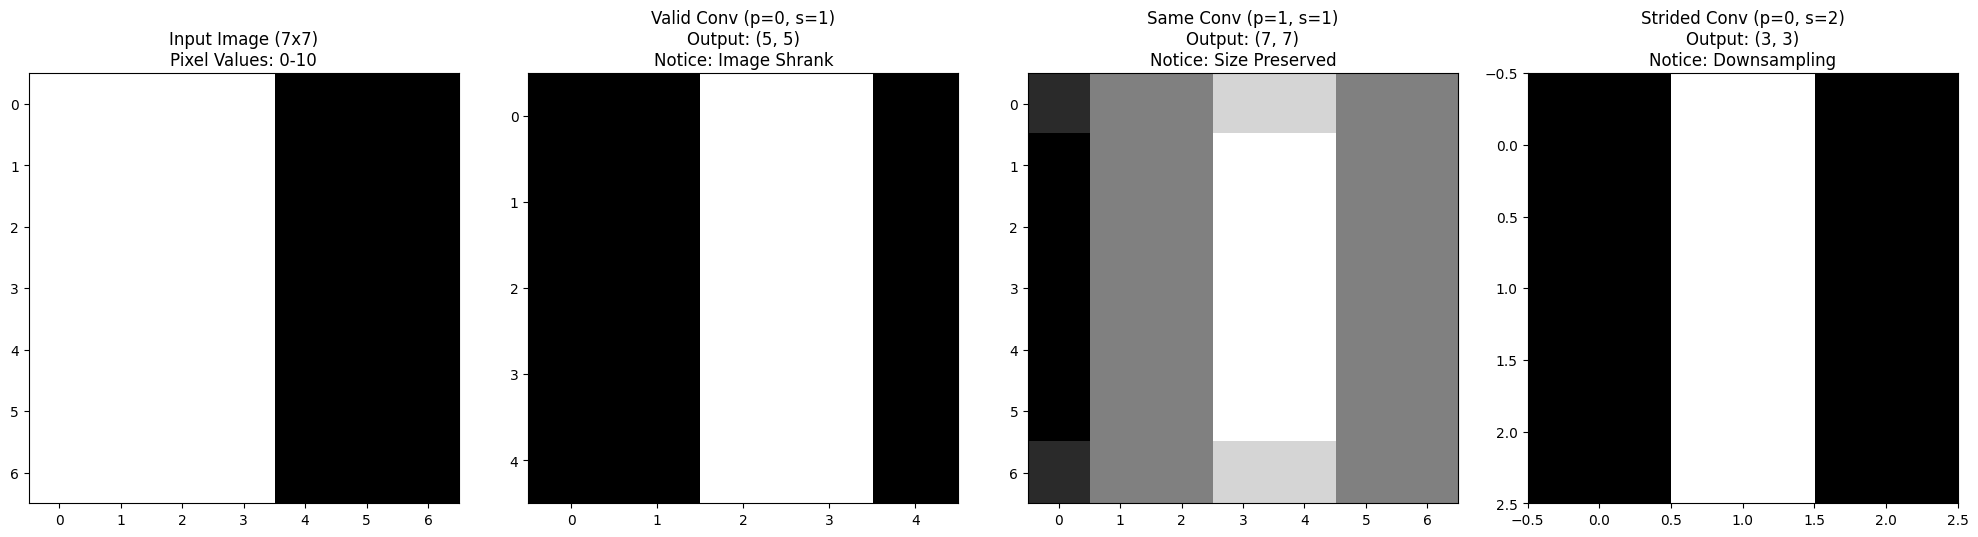

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def convolve_with_padding_stride(image, kernel, padding=0, stride=1):
    """
    Performs 2D convolution with specified padding and stride.
    
    Args:
        image (np.array): Input 2D image (H x W)
        kernel (np.array): Filter matrix (f x f)
        padding (int): Number of zero-padding layers
        stride (int): Step size for the filter
        
    Returns:
        output (np.array): Convolved feature map
    """
    # 1. Add Padding
    # Pad input with zeros around the height and width
    image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    
    # Get dimensions
    (n_H_prev, n_W_prev) = image.shape
    (f, f) = kernel.shape
    
    # 2. Calculate Output Dimensions
    # Formula: floor((n + 2p - f) / s) + 1
    n_H = int((n_H_prev + 2 * padding - f) / stride) + 1
    n_W = int((n_W_prev + 2 * padding - f) / stride) + 1
    
    # Initialize output
    output = np.zeros((n_H, n_W))
    
    # 3. Apply Convolution (Sliding Window)
    for h in range(n_H):            # Loop over vertical axis
        for w in range(n_W):        # Loop over horizontal axis
            # Determine the slice of the padded image
            vert_start = h * stride
            vert_end = vert_start + f
            horiz_start = w * stride
            horiz_end = horiz_start + f
            
            # Extract region of interest
            roi = image_padded[vert_start:vert_end, horiz_start:horiz_end]
            
            # Element-wise multiply and sum
            output[h, w] = np.sum(roi * kernel)
            
    return output

# --- VISUALIZATION SETUP ---

# 1. Create a 7x7 Image with a Vertical Edge (Bright Left, Dark Right)
input_image = np.zeros((7, 7))
input_image[:, :4] = 10  # Left side bright (10)
input_image[:, 4:] = 0   # Right side dark (0)

# 2. Define Vertical Edge Filter (3x3)
vertical_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# --- EXPERIMENTS ---

# Experiment A: Basic Convolution (No Pad, Stride 1) - "Valid"
# Input: 7x7 -> Output: 5x5 (Shrinks)
output_valid = convolve_with_padding_stride(input_image, vertical_filter, padding=0, stride=1)

# Experiment B: "Same" Convolution (Pad 1, Stride 1)
# Input: 7x7 -> Output: 7x7 (Preserves Size)
output_same = convolve_with_padding_stride(input_image, vertical_filter, padding=1, stride=1)

# Experiment C: Strided Convolution (Pad 0, Stride 2)
# Input: 7x7 -> Output: 3x3 (Downsamples)
output_strided = convolve_with_padding_stride(input_image, vertical_filter, padding=0, stride=2)

# --- PLOTTING ---

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Plot Input
ax[0].imshow(input_image, cmap='gray')
ax[0].set_title(f"Input Image (7x7)\nPixel Values: 0-10")

# Plot Valid (Shrinks)
ax[1].imshow(output_valid, cmap='gray')
ax[1].set_title(f"Valid Conv (p=0, s=1)\nOutput: {output_valid.shape}\nNotice: Image Shrank")

# Plot Same (Preserves)
ax[2].imshow(output_same, cmap='gray')
ax[2].set_title(f"Same Conv (p=1, s=1)\nOutput: {output_same.shape}\nNotice: Size Preserved")

# Plot Strided (Shrinks Rapidly)
ax[3].imshow(output_strided, cmap='gray')
ax[3].set_title(f"Strided Conv (p=0, s=2)\nOutput: {output_strided.shape}\nNotice: Downsampling")

plt.tight_layout()
plt.show()

# EX3 CONV WITH STRIDE

Input Shape: (7, 7)
Filter Shape: (3, 3)
Output Shape (Stride=1): (5, 5)
Output Shape (Stride=2): (3, 3) <-- Downsampled


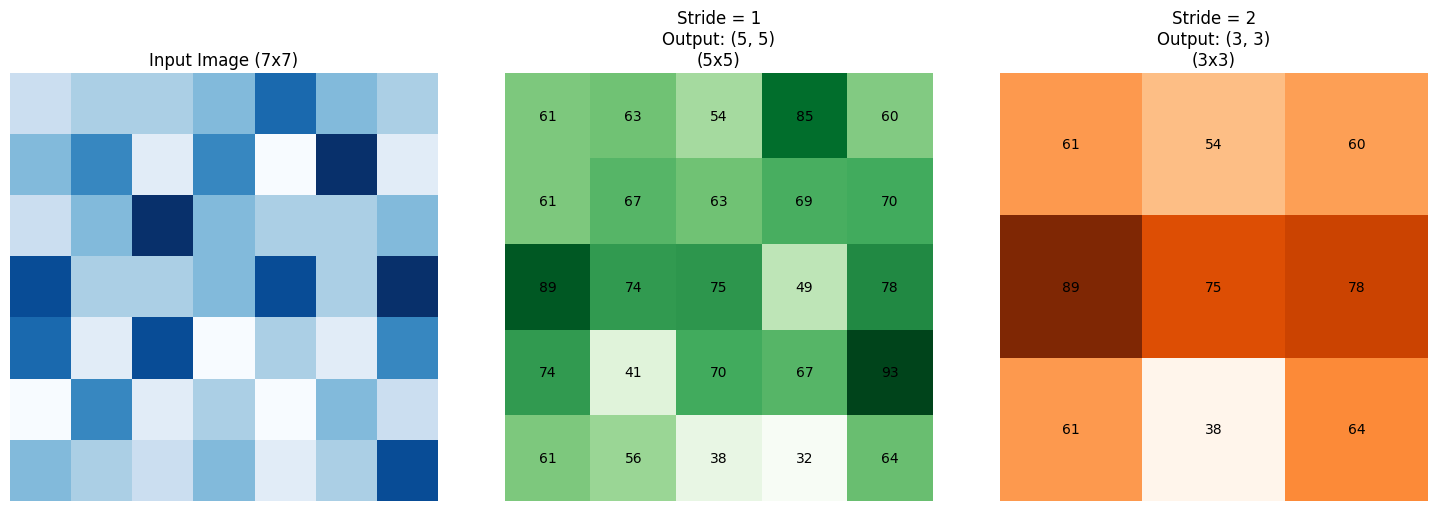

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def convolve_with_stride(image, kernel, stride=1, padding=0):
    """
    Performs 2D convolution with explicit stride and padding.
    """
    # Pad the image
    image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    
    (n_H, n_W) = image.shape
    (f, f) = kernel.shape
    
    # Calculate Output Dimensions using the Formula
    # floor((n + 2p - f) / s) + 1
    new_H = int(np.floor((n_H + 2*padding - f) / stride) + 1)
    new_W = int(np.floor((n_W + 2*padding - f) / stride) + 1)
    
    output = np.zeros((new_H, new_W))
    
    # Convolution Loop
    for h in range(new_H):
        for w in range(new_W):
            # Calculate corners on the padded image
            # Note the multiplication by 'stride' here
            vert_start = h * stride
            vert_end = vert_start + f
            horiz_start = w * stride
            horiz_end = horiz_start + f
            
            # Slice and Convolve
            slice_img = image_padded[vert_start:vert_end, horiz_start:horiz_end]
            output[h, w] = np.sum(slice_img * kernel)
            
    return output

# --- SETUP: The 7x7 Example from the Transcript ---
# Input: 7x7 Image
input_img = np.array([
    [2, 3, 3, 4, 7, 4, 3],
    [4, 6, 1, 6, 0, 9, 1],
    [2, 4, 9, 4, 3, 3, 4],
    [8, 3, 3, 4, 8, 3, 9],
    [7, 1, 8, 0, 3, 1, 6],
    [0, 6, 1, 3, 0, 4, 2],
    [4, 3, 2, 4, 1, 3, 8] 
])

# Filter: 3x3
filter_kernel = np.array([
    [3, 4, 4],
    [1, 0, 2],
    [-1, 0, 3]
])

# --- EXPERIMENTS ---

# 1. Stride = 1 (Standard)
output_s1 = convolve_with_stride(input_img, filter_kernel, stride=1, padding=0)

# 2. Stride = 2 (The Example)
output_s2 = convolve_with_stride(input_img, filter_kernel, stride=2, padding=0)

# --- VISUALIZATION ---
print(f"Input Shape: {input_img.shape}")
print(f"Filter Shape: {filter_kernel.shape}")
print(f"Output Shape (Stride=1): {output_s1.shape}")
print(f"Output Shape (Stride=2): {output_s2.shape} <-- Downsampled")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(input_img, cmap='Blues')
ax[0].set_title(f"Input Image (7x7)")
ax[0].axis('off')

ax[1].imshow(output_s1, cmap='Greens')
ax[1].set_title(f"Stride = 1\nOutput: {output_s1.shape}\n(5x5)")
for (j,i),label in np.ndenumerate(output_s1):
    ax[1].text(i,j,int(label),ha='center',va='center')
ax[1].axis('off')

ax[2].imshow(output_s2, cmap='Oranges')
ax[2].set_title(f"Stride = 2\nOutput: {output_s2.shape}\n(3x3)")
for (j,i),label in np.ndenumerate(output_s2):
    ax[2].text(i,j,int(label),ha='center',va='center')
ax[2].axis('off')

plt.tight_layout()
plt.show()

# EX.4 CONV OVER VOLUMEN 3D

Input Shape: (6, 6, 3)
Filter Shape: (3, 3, 3)
Output Shape: (4, 4, 2) (Height x Width x Num_Filters)


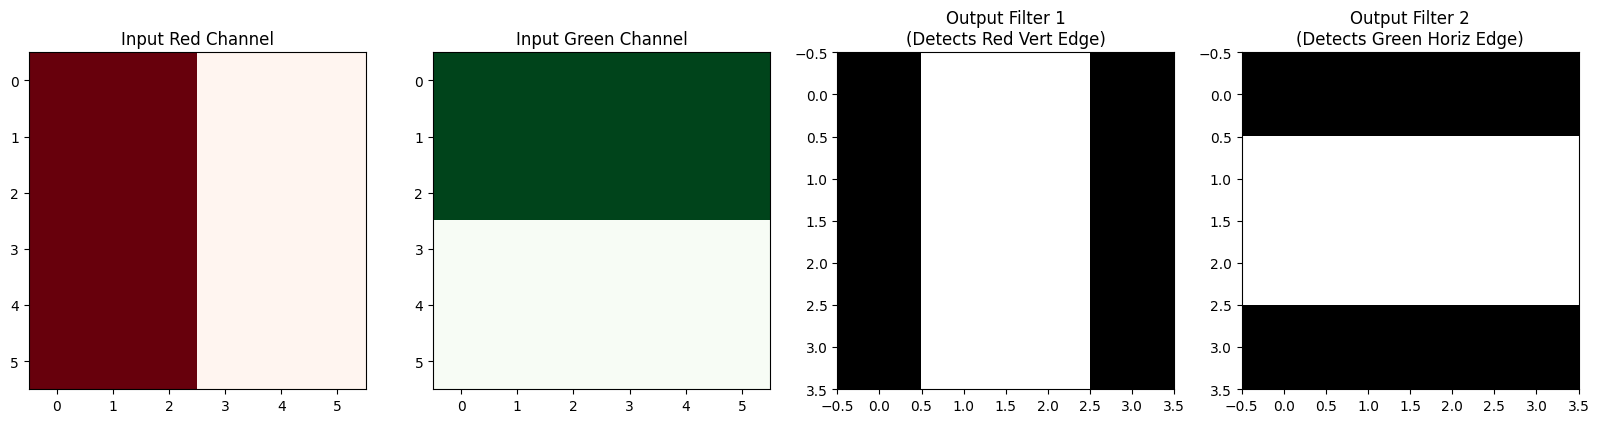

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def convolve_volume(volume, filters, stride=1, padding=0):
    """
    Performs convolution over a 3D volume using multiple 3D filters.
    
    Args:
        volume: Input RGB image (n_H, n_W, n_C)
        filters: List of filters, where each is (f, f, n_C)
        
    Returns:
        output_volume: (new_H, new_W, n_filters)
    """
    (n_H, n_W, n_C) = volume.shape
    num_filters = len(filters)
    (f, f, filter_channels) = filters[0].shape
    
    # Assert channels match
    assert n_C == filter_channels, f"Input channels ({n_C}) must match filter channels ({filter_channels})"
    
    # Calculate output dims (assuming Valid padding)
    new_H = int((n_H - f) / stride) + 1
    new_W = int((n_W - f) / stride) + 1
    
    # Initialize output volume
    output_volume = np.zeros((new_H, new_W, num_filters))
    
    # Loop over each filter
    for i, kernel in enumerate(filters):
        # Loop over spatial positions
        for h in range(new_H):
            for w in range(new_W):
                # Extract the 3D cube from input
                vert_start = h * stride
                vert_end = vert_start + f
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                slice_vol = volume[vert_start:vert_end, horiz_start:horiz_end, :]
                
                # Sum over all dimensions (Height, Width, AND Channels)
                # This squashes the 3D cube into a single scalar
                output_volume[h, w, i] = np.sum(slice_vol * kernel)
                
    return output_volume

# --- SETUP ---
# 1. Create a 6x6x3 Input Volume (RGB)
# Let's make Red channel vertical stripes, Green horizontal, Blue random
input_vol = np.zeros((6, 6, 3))
input_vol[:, :3, 0] = 10  # Red channel: Vertical Edge
input_vol[:3, :, 1] = 10  # Green channel: Horizontal Edge
input_vol[:, :, 2] = np.random.randint(0, 5, (6, 6)) # Blue: Noise

# 2. Define Filters
# Filter 1: Detects Vertical Edges in RED channel only
f1 = np.zeros((3, 3, 3))
f1[:, :, 0] = [[1, 0, -1], [1, 0, -1], [1, 0, -1]] # Look at Red
f1[:, :, 1] = np.zeros((3, 3)) # Ignore Green
f1[:, :, 2] = np.zeros((3, 3)) # Ignore Blue

# Filter 2: Detects Horizontal Edges in GREEN channel only
f2 = np.zeros((3, 3, 3))
f2[:, :, 0] = np.zeros((3, 3)) # Ignore Red
f2[:, :, 1] = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]] # Look at Green
f2[:, :, 2] = np.zeros((3, 3)) # Ignore Blue

# Run Convolution
output = convolve_volume(input_vol, [f1, f2])

# --- VISUALIZATION ---
print(f"Input Shape: {input_vol.shape}")
print(f"Filter Shape: {f1.shape}")
print(f"Output Shape: {output.shape} (Height x Width x Num_Filters)")

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(input_vol[:,:,0], cmap='Reds'); ax[0].set_title("Input Red Channel")
ax[1].imshow(input_vol[:,:,1], cmap='Greens'); ax[1].set_title("Input Green Channel")
ax[2].imshow(output[:,:,0], cmap='gray'); ax[2].set_title("Output Filter 1\n(Detects Red Vert Edge)")
ax[3].imshow(output[:,:,1], cmap='gray'); ax[3].set_title("Output Filter 2\n(Detects Green Horiz Edge)")
plt.show()

# Ex.5 One Layer CONV2

Input Volume: (6, 6, 3)
Number of Filters: 2
Output Volume: (4, 4, 2) (4x4 x 2 Channels)


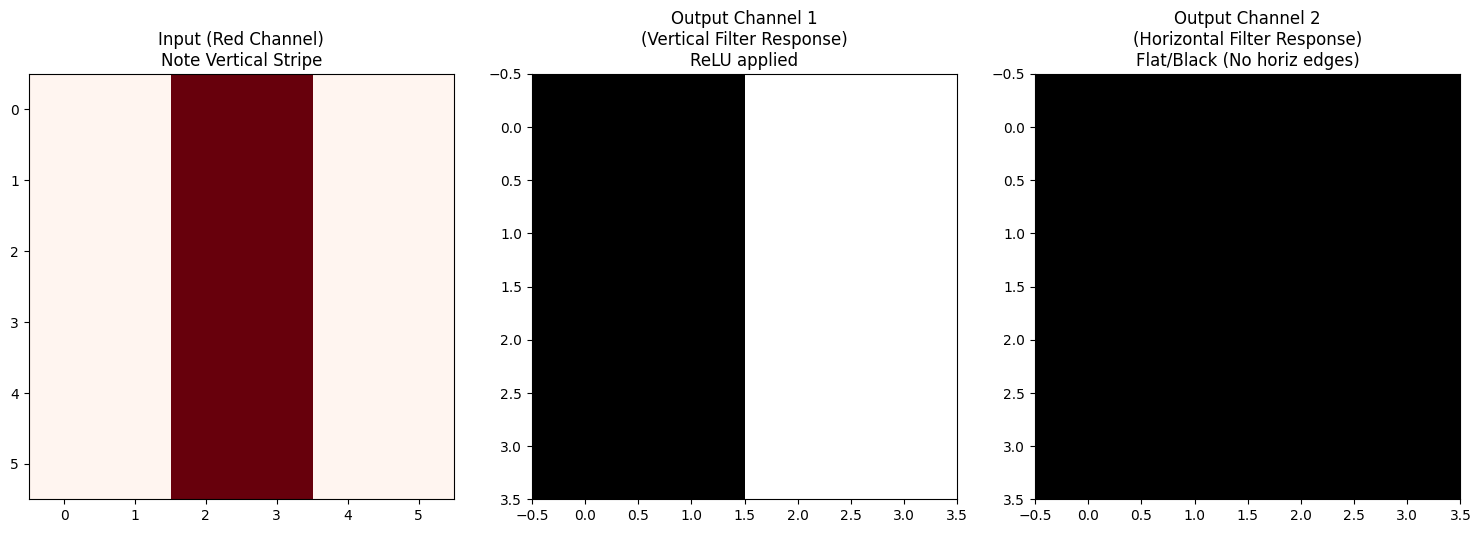

In [9]:
### Full Visualization Implementation
"""
This visualization simulates **One Forward Pass Layer**.
It takes a 3-channel input, applies 2 distinct filters (Vertical & Horizontal), 
adds bias, applies ReLU, and displays the resulting volume.
"""

import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def convolution_layer_step(input_vol, filters, biases, stride=1):
    (n_H_prev, n_W_prev, n_C_prev) = input_vol.shape
    num_filters = len(filters)
    f = filters[0].shape[0] # Filter size (f x f)
    
    # Calculate output dimensions (assuming no padding, stride 1 for visual simplicity)
    n_H = int((n_H_prev - f) / stride) + 1
    n_W = int((n_W_prev - f) / stride) + 1
    
    # Initialize Output Volume (Height x Width x Num_Filters)
    output_vol = np.zeros((n_H, n_W, num_filters))
    
    # Loop over every filter (This determines the depth of the output)
    for i in range(num_filters):
        W = filters[i] # The filter weights
        b = biases[i]  # The filter bias
        
        # Slide the filter
        for h in range(n_H):
            for w in range(n_W):
                vert_start = h * stride
                vert_end = vert_start + f
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                # Extract slice
                a_slice = input_vol[vert_start:vert_end, horiz_start:horiz_end, :]
                
                # LINEAR STEP: Convolution + Bias
                Z = np.sum(a_slice * W) + b
                
                # NON-LINEAR STEP: ReLU
                output_vol[h, w, i] = relu(Z)
                
    return output_vol

# --- SETUP DATA ---
# Input: 6x6x3 Image (Red channel has a vertical stripe)
image = np.zeros((6, 6, 3))
image[:, 2:4, 0] = 10 # Vertical bright strip in Red channel

# Filters (3x3x3)
# Filter 0: Vertical Edge Detector (Focused on Red Channel)
W1 = np.zeros((3, 3, 3))
W1[:, :, 0] = [[1, 0, -1], [1, 0, -1], [1, 0, -1]] 
b1 = 0

# Filter 1: Horizontal Edge Detector (Focused on Red Channel)
W2 = np.zeros((3, 3, 3))
W2[:, :, 0] = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
b2 = 0

filters = [W1, W2]
biases = [b1, b2]

# --- RUN LAYER ---
output_layer = convolution_layer_step(image, filters, biases)

# --- VISUALIZE ---
print(f"Input Volume: {image.shape}")
print(f"Number of Filters: {len(filters)}")
print(f"Output Volume: {output_layer.shape} (4x4 x 2 Channels)")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot Input Red Channel
ax[0].imshow(image[:,:,0], cmap='Reds')
ax[0].set_title("Input (Red Channel)\nNote Vertical Stripe")

# Plot Output Channel 0 (Vertical Filter)
ax[1].imshow(output_layer[:,:,0], cmap='gray')
ax[1].set_title("Output Channel 1\n(Vertical Filter Response)\nReLU applied")

# Plot Output Channel 1 (Horizontal Filter)
ax[2].imshow(output_layer[:,:,1], cmap='gray')
ax[2].set_title("Output Channel 2\n(Horizontal Filter Response)\nFlat/Black (No horiz edges)")

plt.tight_layout()
plt.show()

## Explanation CNN Layer: Forward Pass & Visualization Analysis



### 1. The Input ($6 \times 6 \times 3$)
The input is a 3-channel (RGB) volume. In this specific code:
* **Red Channel:** Contains a vertical stripe (values of 10) in the middle.
* **Green/Blue Channels:** Filled with zeros (completely dark).

### 2. Linear Transformation ($Z = W \cdot x + b$)
The function `convolution_layer_step` performs the core math:
* **The Slump:** A $3 \times 3 \times 3$ filter slides over the image.
* **Filter 1 (Vertical):** Weighted to detect color changes from left-to-right.
* **Filter 2 (Horizontal):** Weighted to detect color changes from top-to-bottom.
* **The Sum:** It calculates the element-wise product of the filter and the image slice, then adds the **Bias ($b$)**.



### 3. Non-Linear Activation (ReLU)
The `relu(Z)` function is applied to the result:
* **Logic:** It keeps positive values and turns all negative results to **0 (Black)**.
* **Purpose:** This "cleans" the signal, keeping only the pixels where the pattern was actually found.

### 4. Why the Output looks this way:
* **Output Channel 1 (Vertical Edge):** Shows a bright band. The vertical filter "fired" because it found the edges of the red vertical stripe.
* **Output Channel 2 (Horizontal Edge):** Completely **black**. Since the input only had a vertical stripe, the horizontal filter found no matching patterns.
* **Dimensionality Shrinkage:** * **Width/Height:** $6 \times 6 \rightarrow 4 \times 4$. This happens because we used a $3 \times 3$ filter without padding ($n - f + 1$).
    * **Depth:** $3 \rightarrow 2$. The output depth is always equal to the **number of filters** applied.

---
### Math Summary
| Step | Formula | Result in this Example |
| :--- | :--- | :--- |
| **Linear** | $Z = \sum(Image \times Weight) + Bias$ | Detects patterns (edges) |
| **Activation** | $A = \max(0, Z)$ | Removes noise/negatives |
| **Shape** | $(n - f + 1) \times (n - f + 1) \times n_{filters}$ | $4 \times 4 \times 2$ |

# EX.4 ConvNet Example

Start: Input Image (39, 39, 3)
Layer 1 Output: (37, 37, 10)
Layer 2 Output: (17, 17, 20)
Layer 3 Output: (7, 7, 40)
Flattened Vector: 1960 units


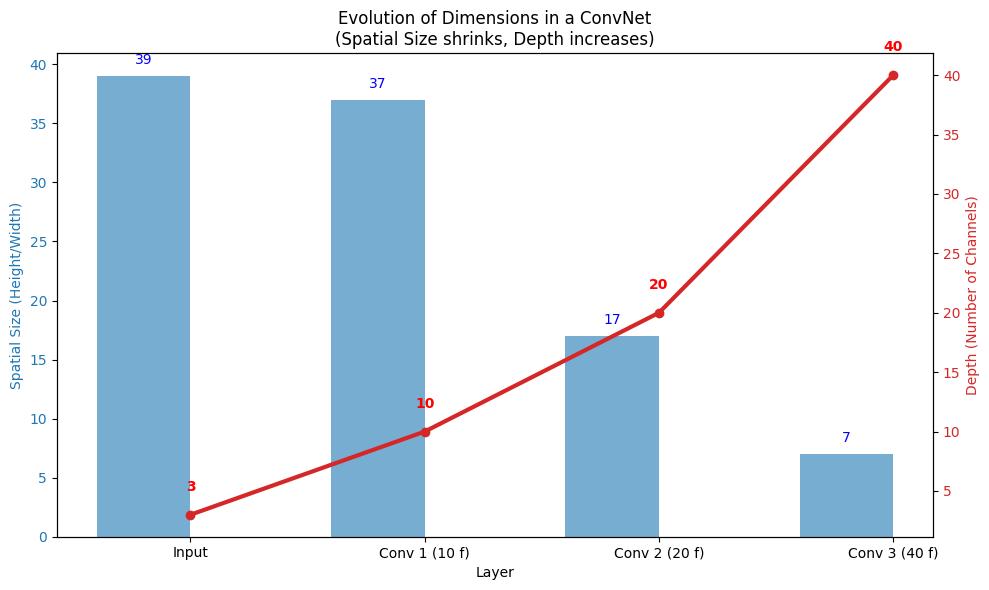

In [13]:
### Full Visualization Implementation

"""
This script simulates the architecture defined in the transcript, 
printing the shape transformations at every step to visualize 
the "shrinking spatial / growing depth" trend.
"""

import numpy as np
import matplotlib.pyplot as plt

def simulate_conv_layer(input_shape, f, filters, stride, padding=0):
    """
    Simulates the change in dimensions for a Conv Layer.
    """
    n_H_prev, n_W_prev, n_C_prev = input_shape
    
    # Calculate new dimensions
    n_H = int(np.floor((n_H_prev + 2*padding - f) / stride) + 1)
    n_W = int(np.floor((n_W_prev + 2*padding - f) / stride) + 1)
    n_C = filters
    
    return (n_H, n_W, n_C)

# --- ARCHITECTURE DEFINITION ---
# Input Image: 39 x 39 x 3
current_shape = (39, 39, 3)
history = [current_shape]
layer_names = ["Input"]

print(f"Start: Input Image {current_shape}")

# Layer 1: Conv 3x3, s=1, 10 filters
current_shape = simulate_conv_layer(current_shape, f=3, filters=10, stride=1)
history.append(current_shape)
layer_names.append("Conv 1 (10 f)")
print(f"Layer 1 Output: {current_shape}")

# Layer 2: Conv 5x5, s=2, 20 filters
current_shape = simulate_conv_layer(current_shape, f=5, filters=20, stride=2)
history.append(current_shape)
layer_names.append("Conv 2 (20 f)")
print(f"Layer 2 Output: {current_shape}")

# Layer 3: Conv 5x5, s=2, 40 filters
current_shape = simulate_conv_layer(current_shape, f=5, filters=40, stride=2)
history.append(current_shape)
layer_names.append("Conv 3 (40 f)")
print(f"Layer 3 Output: {current_shape}")

# Flatten
flat_size = current_shape[0] * current_shape[1] * current_shape[2]
print(f"Flattened Vector: {flat_size} units")

# --- VISUALIZATION OF SHAPES ---
# Plotting the trade-off between Spatial Size (Height) and Depth (Channels)

heights = [h[0] for h in history]
depths = [h[2] for h in history]
x_pos = np.arange(len(history))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Spatial Size
color = 'tab:blue'
ax1.set_xlabel('Layer')
ax1.set_ylabel('Spatial Size (Height/Width)', color=color)
bars = ax1.bar(x_pos - 0.2, heights, 0.4, color=color, label='Height/Width', alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(layer_names)

# Create a second y-axis for Depth
ax2 = ax1.twinx() 
color = 'tab:red'
ax2.set_ylabel('Depth (Number of Channels)', color=color)
line = ax2.plot(x_pos, depths, color=color, marker='o', linewidth=3, label='Channels')
ax2.tick_params(axis='y', labelcolor=color)

# Add annotations
for i, (h, d) in enumerate(zip(heights, depths)):
    ax1.text(i - 0.2, h + 1, str(h), color='blue', ha='center')
    ax2.text(i, d + 2, str(d), color='red', ha='center', fontweight='bold')

plt.title("Evolution of Dimensions in a ConvNet\n(Spatial Size shrinks, Depth increases)")
fig.tight_layout()
plt.show()